# Tahu lah apa ini?

In [1]:
# Path to google drive folder
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002. Laporan-eksperimen
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024/

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, VotingClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from pyod.models.hbos import HBOS
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, roc_auc_score, roc_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, OutlierMixin
from scipy.spatial.distance import mahalanobis

In [2]:
# Load the dataset
# file_path = '01.Dataset-Rofiqul/agriculture_dataset.csv'
# file_path = '01.Dataset-Rofiqul/Ujicoba3-29052024/agriculture_dataset.csv'
# file_path = 'dataset/agriculture_dataset.csv'
# file_path = 'dataset/09_05_1_AgricultureOutliersResult_30052024.csv'
# file_path = 'dataset/09_05_3_0_AgricultureOutliersDetectionResults.csv'
# file_path = 'dataset/09_05_3_2_AgricultureOutliersVotingBasedResult.csv'
file_path = 'dataset/09_05_4_1_AgricultureOutliers_HardVotingBased_IDO.csv'
data= pd.read_csv(file_path)




In [71]:
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
hard=data[data['majority_voting']==1]

In [18]:
hard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2072 non-null   object 
 1   Year             2072 non-null   int64  
 2   Experiment       2072 non-null   object 
 3   DataUse          2072 non-null   object 
 4   Replication      2072 non-null   object 
 5   Month            2072 non-null   object 
 6   Vegetation       2072 non-null   object 
 7   VegType          2072 non-null   object 
 8   N2O              2072 non-null   float64
 9   N_rate           2072 non-null   int64  
 10  PP2              2072 non-null   float64
 11  PP7              2072 non-null   float64
 12  AirT             2072 non-null   float64
 13  DAF_TD           2072 non-null   int64  
 14  DAF_SD           2072 non-null   int64  
 15  WFPS25cm         2072 non-null   float64
 16  NH4              2072 non-null   float64
 17  NO3           

In [4]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,Clay,Sand,SOM,if_outlier,dbscan_outlier,ocsvm_outlier,majority_voting,hard_voting,average_voting,weighted_voting
0,2/9/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,...,62.500000,637.500000,1.174072,1,1,1,1,1,1,1
1,2/10/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,...,62.500000,637.500000,1.174072,1,1,1,1,1,1,1
2,2/18/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,...,62.500000,637.500000,1.174072,1,1,1,1,1,1,1
3,2/19/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,...,62.500000,637.500000,1.174072,1,1,1,1,1,1,1
4,3/16/12,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,...,62.500000,637.500000,1.174072,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,10/16/2013,2013,MCSE-T2,Testing,R4,October,TRIAE,Annual,1.640000,91,...,128.333333,491.666667,1.806000,1,1,1,1,1,1,1
2068,11/15/2013,2013,MCSE-T2,Testing,R1,November,TRIAE,Annual,0.990000,91,...,162.500000,490.375000,1.496400,1,1,1,1,1,1,1
2069,11/15/2013,2013,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.200000,91,...,183.250000,432.875000,1.186800,1,1,1,1,1,1,1
2070,11/15/2013,2013,MCSE-T2,Testing,R3,November,TRIAE,Annual,0.300000,91,...,169.833333,418.833333,1.823200,1,1,1,1,1,1,1


## Prepare Train Test Split

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.cm as cm

In [79]:
# Preprocess the data
features = data.drop(columns=['N2O'])  # Assuming 'N2O' is the target column
target = data['N2O']

# Encode categorical variables if any
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Define X and y
X = scaled_features
y = target

In [86]:
def train_and_evaluate_mse(X, y, test_size):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # For AUROC (Area Under the ROC Curve) we need to binarize the output (classification metric)
    # Assuming y_test and y_pred are continuous, you can calculate a binary AUROC like this:
    y_test_binary = np.where(y_test > y_test.mean(), 1, 0)
    y_pred_binary = np.where(y_pred > y_pred.mean(), 1, 0)
    auroc = roc_auc_score(y_test_binary, y_pred_binary)

    # Create a DataFrame to store the metrics
    metrics_df = pd.DataFrame({
        'Metric': ['MSE', 'RMSE', 'MAE', 'R²', 'AUROC'],
        'Value': [mse, rmse, mae, r2, auroc]
    })

    # Visualize the metrics
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
    plt.title(f'Model Performance Metrics (Test Size: {test_size})')
    plt.ylim(0, 1.2 * metrics_df['Value'].max())  # Adjust y-axis for better visualization
    plt.show()

    return model, mse, rmse, mae, r2, auroc

# Example of how to call the function
# Assuming X and y are already defined
# model, mse, rmse, mae, r2, auroc = train_and_evaluate(X, y, test_size=0.2)


In [100]:
def train_and_evaluate_roc_auc(X, y, test_size):
    # Convert y to binary (if it's continuous or multi-class)
    y_binary = np.where(y > np.median(y), 1, 0)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=test_size, random_state=42)

    # Initialize the XGBoost model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Test Size:'+str(test_size))
    plt.legend(loc='lower right')
    plt.grid(True)
     # Adjust layout
    plt.tight_layout()
    # Save the figure
    plt.savefig(f'visual/0906_combined_test_{int(test_size*100)}_AUROC_NoOutlier_IDO.png', dpi=300, bbox_inches='tight')

    plt.show()

    return model, auc

# Example of how to call the function
# Assuming X and y are already defined and y is continuous or multi-class
# model, auc = train_and_evaluate_roc_auc(X, y, test_size=0.2)


In [88]:


def train_and_evaluate(X, y, test_size):
    # Convert X to DataFrame if it's not already
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=[f'F{i}' for i in range(X.shape[1])])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test Size: {test_size}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")

    # Create a single figure with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    residuals = y_test - y_pred
    categories = pd.cut(residuals, bins=5, labels=False)  # Bins can be adjusted
    # Plot the actual vs predicted values
    sns.scatterplot(x=y_test, y=y_pred, ax=axes[0], hue=categories, palette='coolwarm')
    axes[0].set_xlabel('Actual N2O')
    axes[0].set_ylabel('Predicted N2O')
    axes[0].set_title(f'Actual vs Predicted N2O (Test Size: {test_size})')
    axes[0].tick_params(axis='x', rotation=45)

    # Plot residuals with a different color palette
    sns.histplot(residuals, kde=True, ax=axes[1], color='purple')
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f'Residuals Distribution (Test Size: {test_size})')
    axes[1].tick_params(axis='x', rotation=45)

    # Plot feature importance using actual column names
    feature_importance_dict = model.get_booster().get_score(importance_type='weight')
    feature_importance_named = {X.columns[int(k[1:])]: v for k, v in feature_importance_dict.items()}
    sorted_feature_importance = dict(sorted(feature_importance_named.items(), key=lambda item: item[1], reverse=True))

    # Normalize feature importance for coloring
    norm = plt.Normalize(min(sorted_feature_importance.values()), max(sorted_feature_importance.values()))
    cmap = plt.cm.viridis  # Corrected usage of get_cmap

    colors = cmap(norm(list(sorted_feature_importance.values())))

    # Barh with labels for feature importance
    for i, (feature, importance) in enumerate(sorted_feature_importance.items()):
        axes[2].barh(feature, importance, color=colors[i])
        axes[2].text(importance, i, f'{importance:.2f}', va='center', ha='left')

    axes[2].set_title('Feature Importance')
    axes[2].set_xlabel('Importance')
    axes[2].invert_yaxis()  # Most important feature at the top
    axes[2].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout()
    # Save the figure
    plt.savefig(f'visual/0906_combined_test_{int(test_size*100)}_NoOutlier_IDO.png', dpi=300, bbox_inches='tight')

    plt.show()

    return model, mse, rmse, mae, r2


In [53]:
def train_and_evaluatex(test_size):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test Size: {test_size}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")

     # Create a single figure with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    residuals = y_test - y_pred
    categories = pd.cut(residuals, bins=5, labels=False)  # Bins can be adjusted
    # Plot the actual vs predicted values
    # sns.scatterplot(x=y_test, y=y_pred, ax=axes[0], color='blue')
    # sns.scatterplot(x=y_test, y=y_pred, ax=axes[0], hue=y_test, palette='coolwarm')
    sns.scatterplot(x=y_test, y=y_pred, ax=axes[0], hue=categories, palette='viridis')
    axes[0].set_xlabel('Actual N2O')
    axes[0].set_ylabel('Predicted N2O')
    axes[0].set_title(f'Actual vs Predicted N2O (Test Size: {test_size})')
    axes[0].tick_params(axis='x', rotation=45)

    # Plot residuals
    sns.histplot(residuals, kde=True, ax=axes[1], color='green')
    # Create a new column in the DataFrame or Series to categorize residuals

    # Plot with categorized residuals
    # sns.histplot(residuals, kde=True, ax=axes[1], palette='viridis')
    # sns.scatterplot(x=y_test, y=y_pred, ax=axes[1], hue=categories, palette='viridis')
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f'Residuals Distribution (Test Size: {test_size})')
    axes[1].tick_params(axis='x', rotation=45)


    # Plot feature importance
    xgb.plot_importance(model, ax=axes[2], max_num_features=10, importance_type='weight')
    axes[2].set_title('Feature Importance')
    axes[2].set_xlabel('Importance')
    axes[2].tick_params(axis='x', rotation=45)

     # Adjust layout
    plt.tight_layout()
    # Save the figure
    plt.savefig(f'visual/0906_combined_test_{int(test_size*100)}_NoOutlier_IDO.png',dpi=300, bbox_inches='tight')

    plt.show()

    return model, mse, rmse, mae, r2

c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test Size: 0.2
Mean Squared Error: 6.4465108245330445
Root Mean Squared Error: 2.538997996165622
Mean Absolute Error: 1.7230130150604073
R-squared: 0.6436072514387197


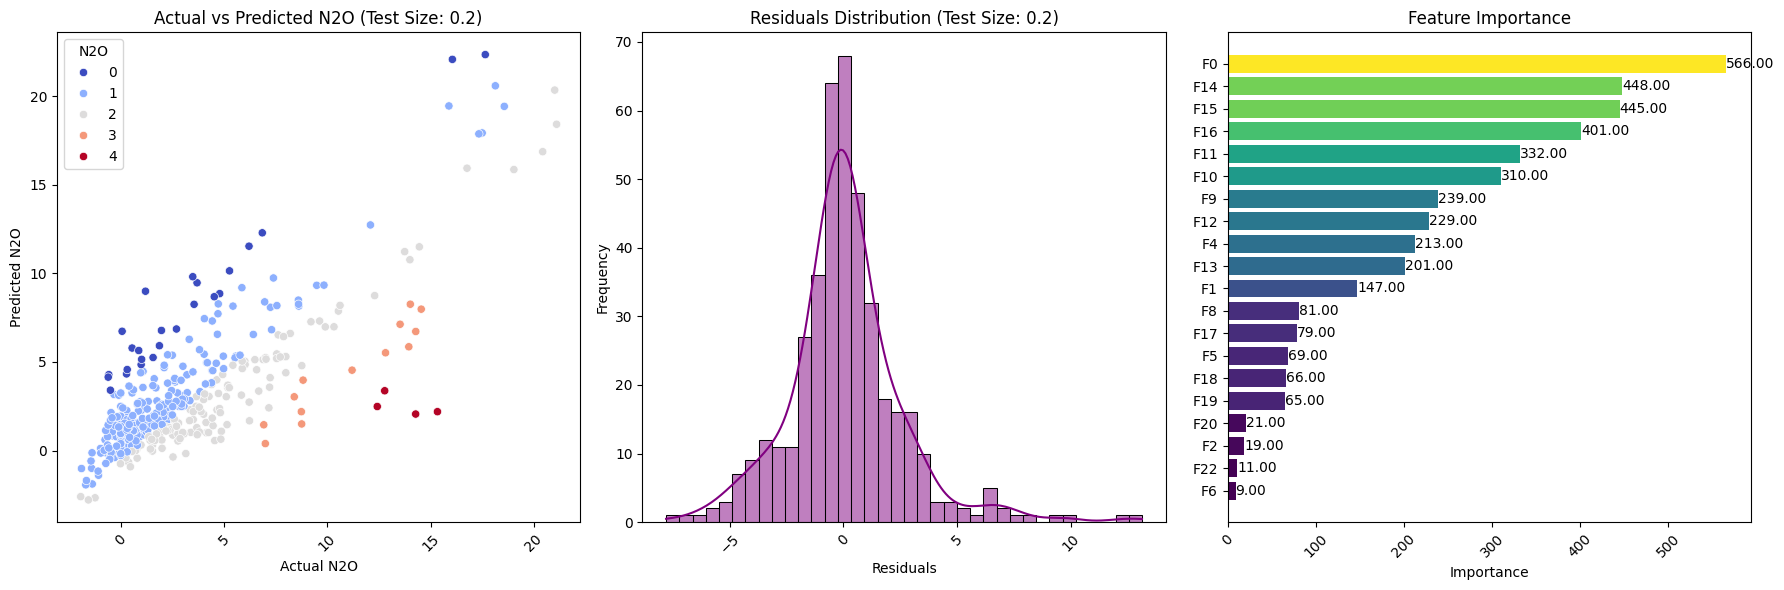

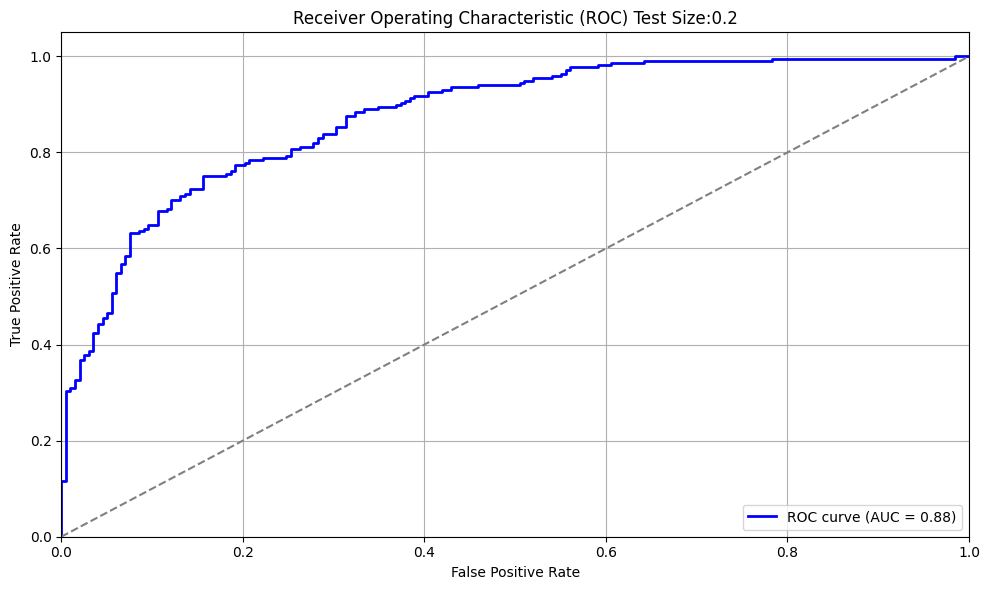

c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test Size: 0.25
Mean Squared Error: 6.8703497053095575
Root Mean Squared Error: 2.62113519401605
Mean Absolute Error: 1.8153531356167323
R-squared: 0.607466559430857


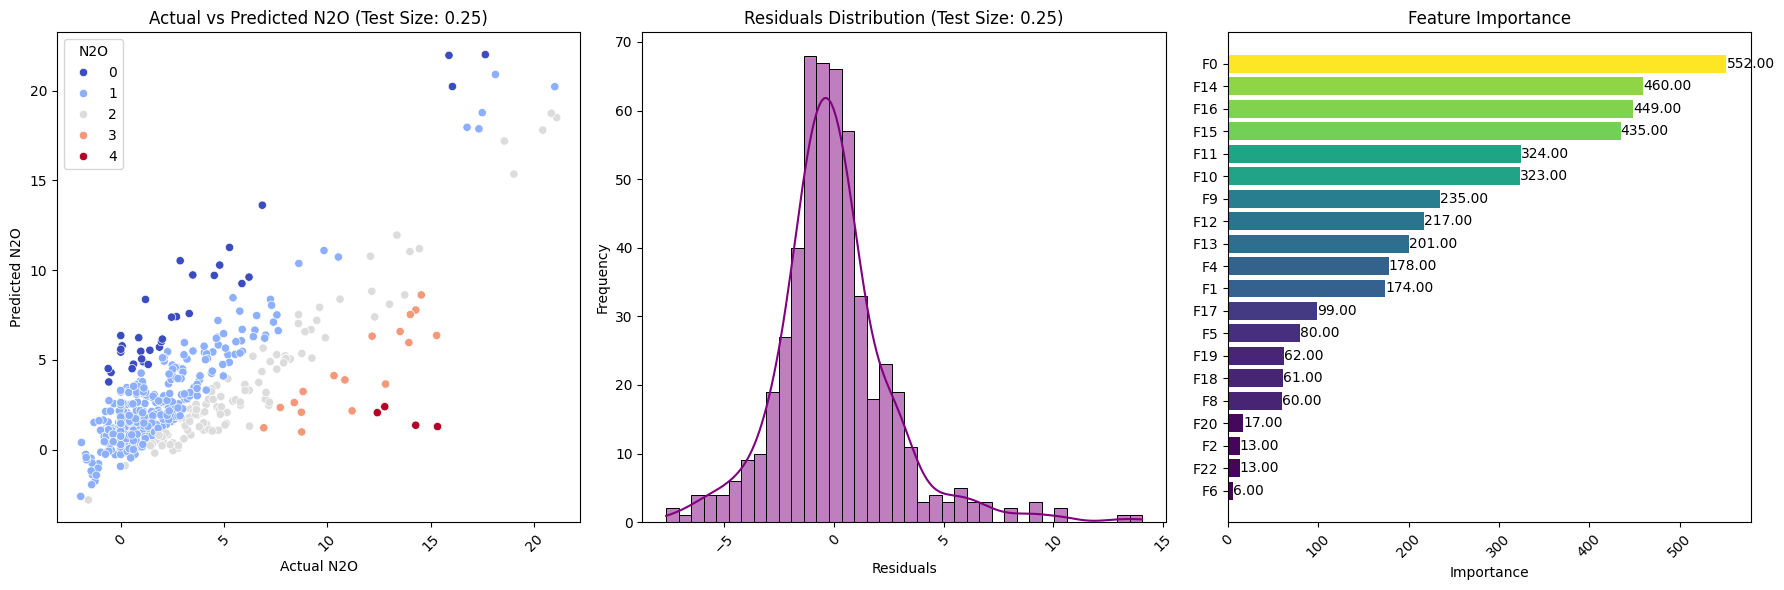

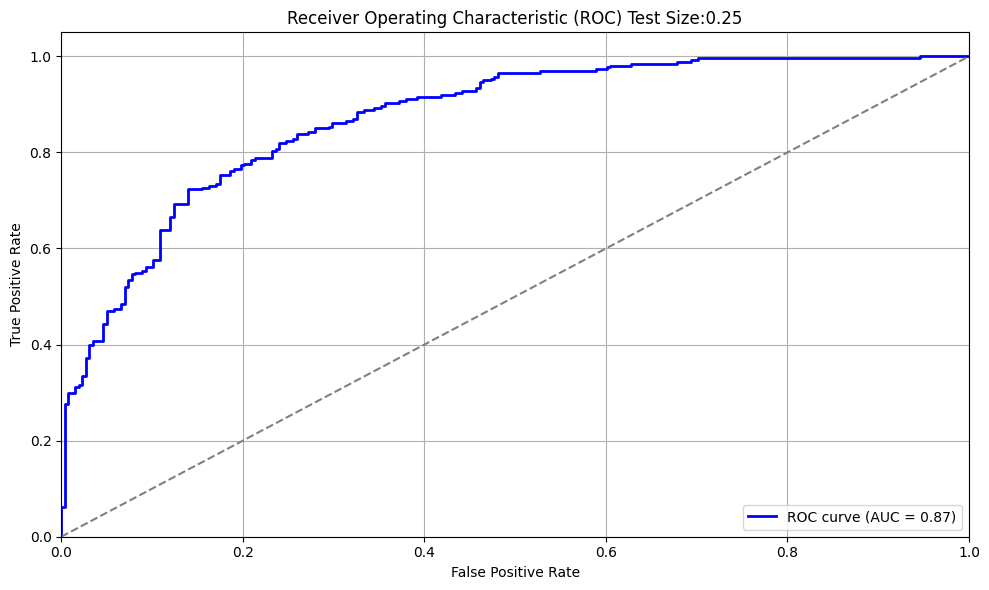

c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test Size: 0.3
Mean Squared Error: 6.444760713799277
Root Mean Squared Error: 2.5386533268249285
Mean Absolute Error: 1.7454914015029237
R-squared: 0.614602712385986


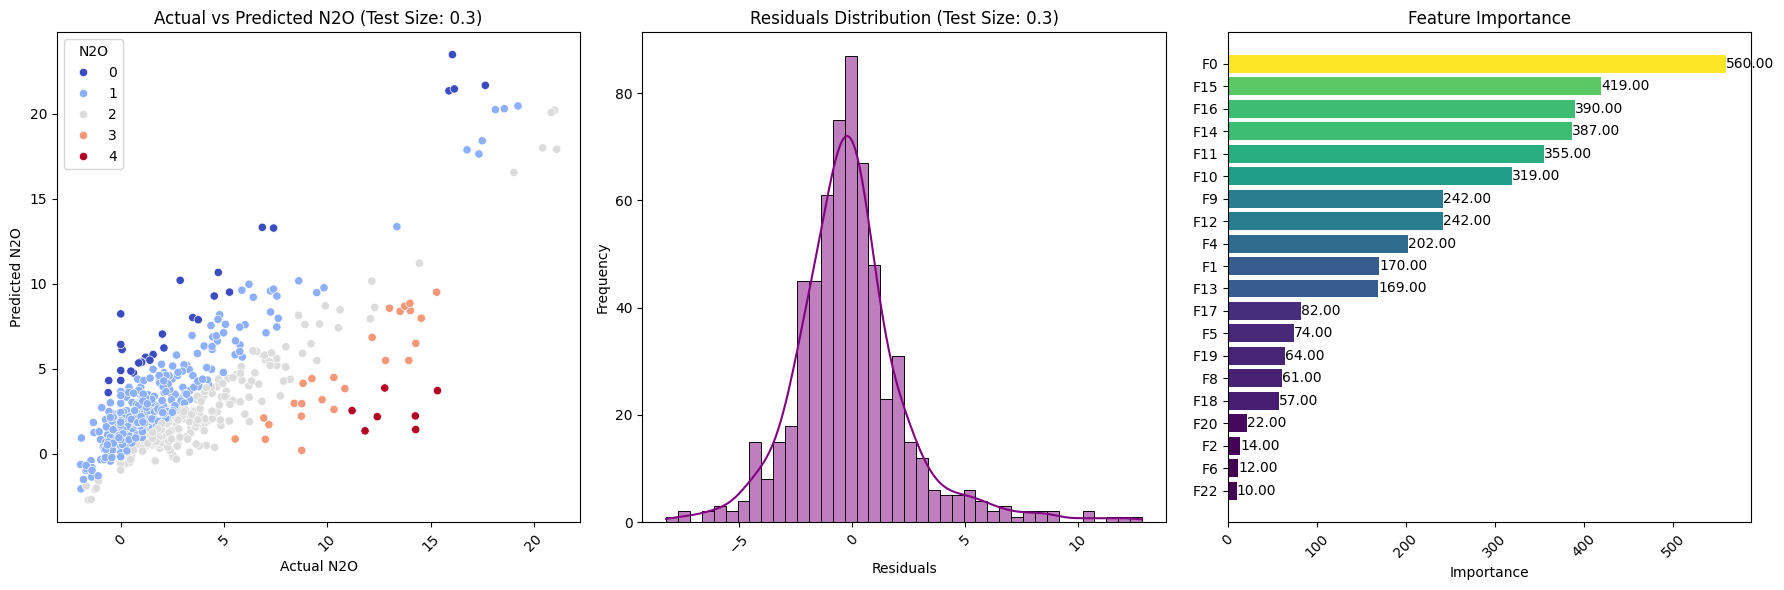

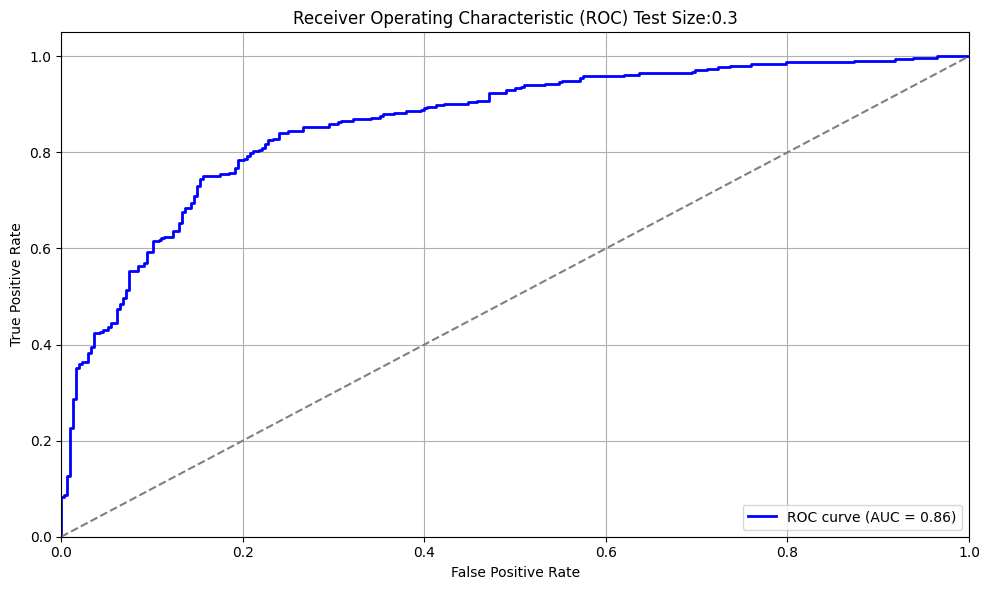

c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test Size: 0.35
Mean Squared Error: 6.976570707525591
Root Mean Squared Error: 2.6413198798187225
Mean Absolute Error: 1.8185957799326642
R-squared: 0.5690857817231034


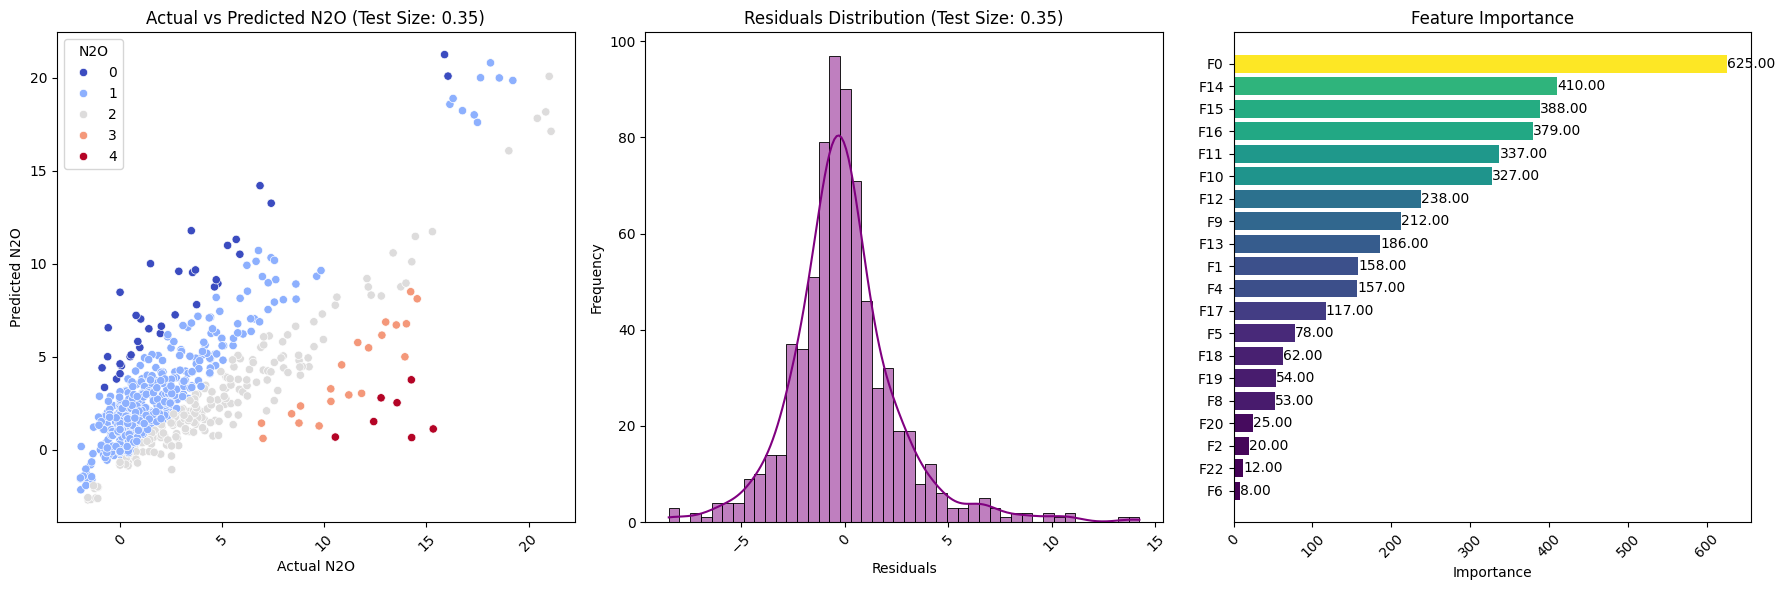

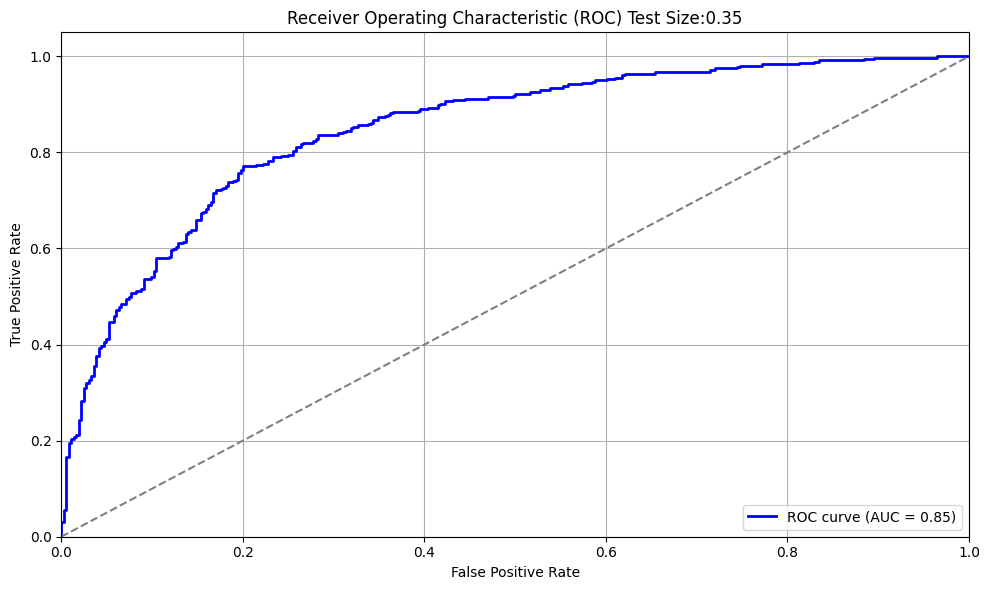

In [101]:
test_sizes = [0.2,0.25, 0.3, 0.35]
results = {}
# Initialize an empty list to store results
evaluation = []
for test_size in test_sizes:
    model, mse, rmse, mae, r2 = train_and_evaluate(X,y,test_size)
    model, auc = train_and_evaluate_roc_auc(X, y, test_size)
    results[test_size] = {'model': model, 'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2,'auc':auc}
    evaluation.append({
        'test_size': test_size,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'auc':auc
    })


In [103]:
# !pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   --------- ------------------------------ 61.4/250.9 kB 1.6 MB/s eta 0:00:01
   ------------------------------- -------- 194.6/250.9 kB 2.3 MB/s eta 0:00:01
   ----------------------------------- ---- 225.3/250.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
# Convert results to a DataFrame
eval_df = pd.DataFrame(evaluation)

# Save the results to a CSV file
eval_df.to_excel('dataset/0906_1_xgboost_evaluation_datauji_plain_nooutliers_results_IDO_NoCV.xlsx', index=False)
eval_df

,test_size,mse,rmse,mae,r2,auc
0,0.20,6.446511,2.538998,1.723013,0.643607,0.875180
1,0.25,6.870350,2.621135,1.815353,0.607467,0.871869
2,0.30,6.444761,2.538653,1.745491,0.614603,0.861124
3,0.35,6.976571,2.641320,1.818596,0.569086,0.847968


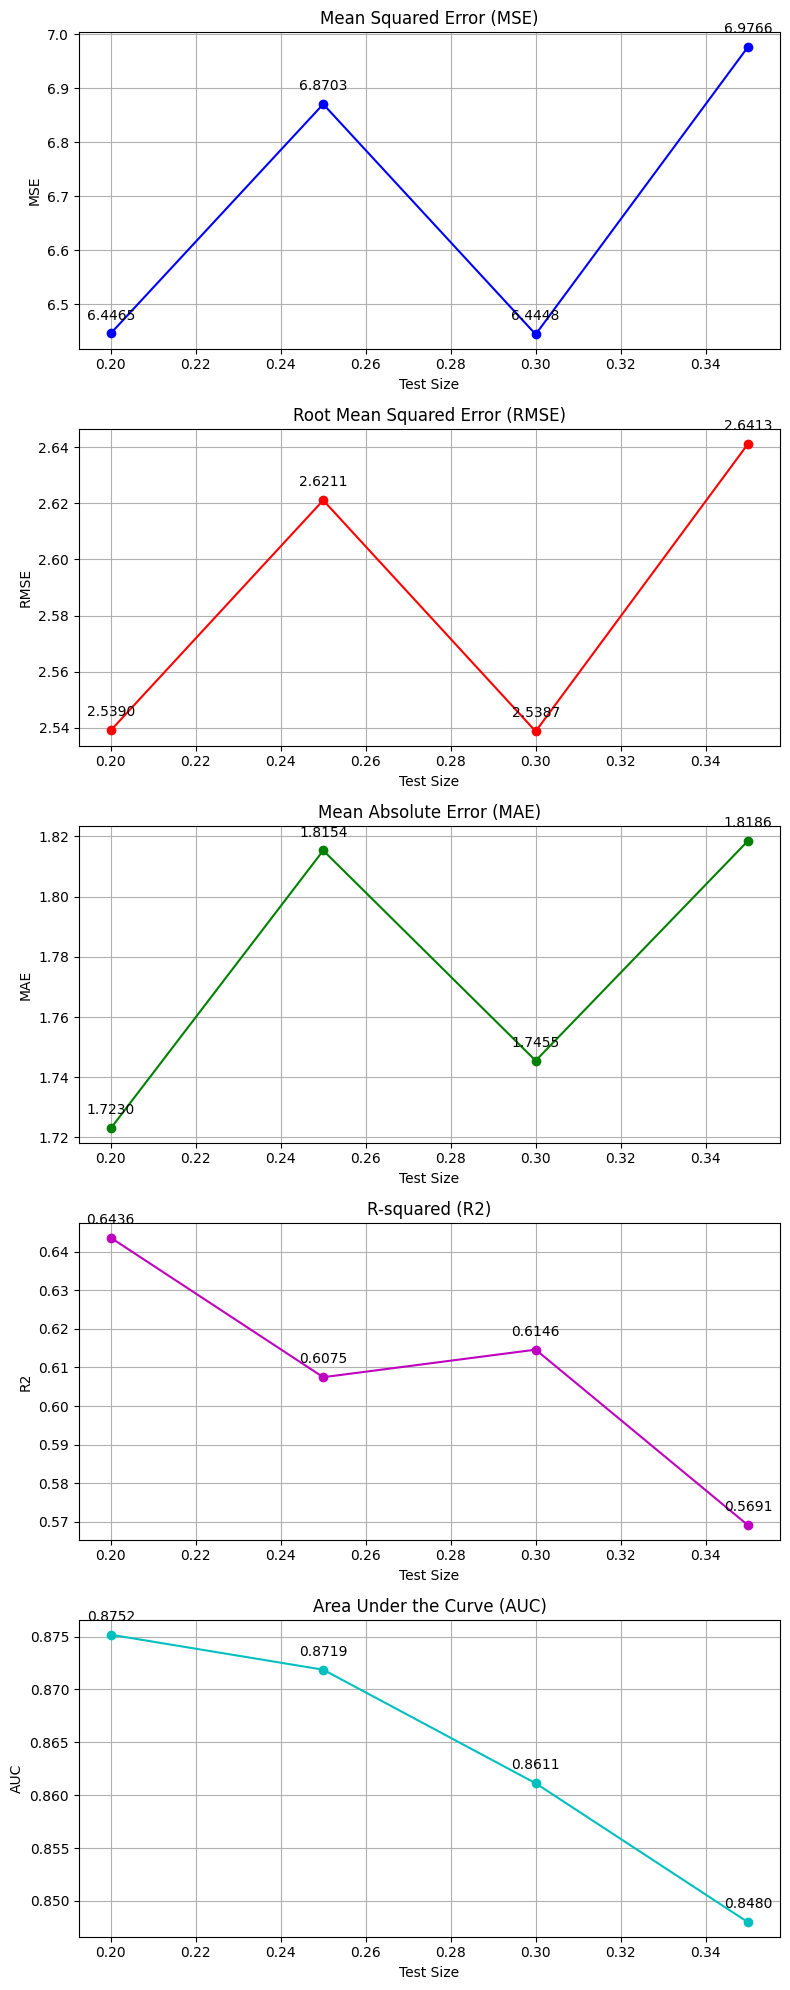

In [95]:

# Extracting columns for visualization
test_size = eval_df['test_size']
mse = eval_df['mse']
rmse = eval_df['rmse']
mae = eval_df['mae']
r2 = eval_df['r2']
auc = eval_df['auc']

# Create subplots for each metric in a single column
fig, axes = plt.subplots(5, 1, figsize=(8, 20))

# Plot MSE
axes[0].plot(test_size, mse, marker='o', linestyle='-', color='b')
for i, txt in enumerate(mse):
    axes[0].annotate(f'{txt:.4f}', (test_size[i], mse[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_xlabel('Test Size')
axes[0].set_ylabel('MSE')
axes[0].grid(True)

# Plot RMSE
axes[1].plot(test_size, rmse, marker='o', linestyle='-', color='r')
for i, txt in enumerate(rmse):
    axes[1].annotate(f'{txt:.4f}', (test_size[i], rmse[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[1].set_title('Root Mean Squared Error (RMSE)')
axes[1].set_xlabel('Test Size')
axes[1].set_ylabel('RMSE')
axes[1].grid(True)

# Plot MAE
axes[2].plot(test_size, mae, marker='o', linestyle='-', color='g')
for i, txt in enumerate(mae):
    axes[2].annotate(f'{txt:.4f}', (test_size[i], mae[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[2].set_title('Mean Absolute Error (MAE)')
axes[2].set_xlabel('Test Size')
axes[2].set_ylabel('MAE')
axes[2].grid(True)

# Plot R2
axes[3].plot(test_size, r2, marker='o', linestyle='-', color='m')
for i, txt in enumerate(r2):
    axes[3].annotate(f'{txt:.4f}', (test_size[i], r2[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[3].set_title('R-squared (R2)')
axes[3].set_xlabel('Test Size')
axes[3].set_ylabel('R2')
axes[3].grid(True)

# Plot AUC
axes[4].plot(test_size, auc, marker='o', linestyle='-', color='c')
for i, txt in enumerate(auc):
    axes[4].annotate(f'{txt:.4f}', (test_size[i], auc[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[4].set_title('Area Under the Curve (AUC)')
axes[4].set_xlabel('Test Size')
axes[4].set_ylabel('AUC')
axes[4].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


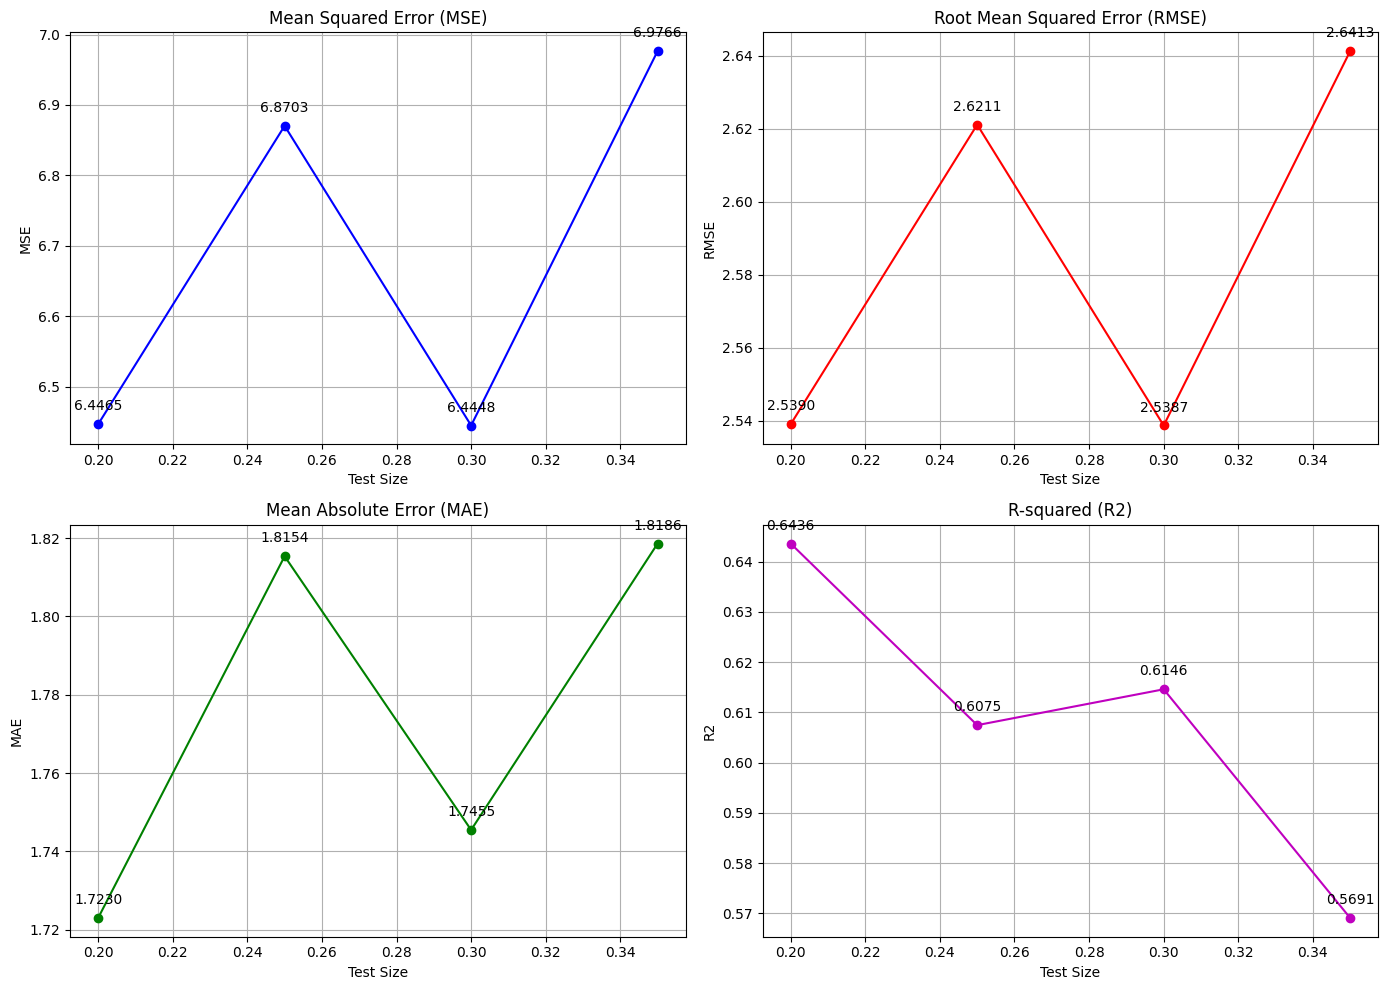

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new dataset
# data = pd.read_csv('/mnt/data/0906_1_xgboost_evaluation_datauji_plain_nooutliers_results_IDO_NoCV.csv')

# Extracting columns for visualization
test_size = eval_df['test_size']
mse = eval_df['mse']
rmse = eval_df['rmse']
mae = eval_df['mae']
r2 = eval_df['r2']
auc = eval_df['auc']

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot MSE
axes[0, 0].plot(test_size, mse, marker='o', linestyle='-', color='b')
for i, txt in enumerate(mse):
    axes[0, 0].annotate(f'{txt:.4f}', (test_size[i], mse[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].set_xlabel('Test Size')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].grid(True)

# Plot RMSE
axes[0, 1].plot(test_size, rmse, marker='o', linestyle='-', color='r')
for i, txt in enumerate(rmse):
    axes[0, 1].annotate(f'{txt:.4f}', (test_size[i], rmse[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[0, 1].set_title('Root Mean Squared Error (RMSE)')
axes[0, 1].set_xlabel('Test Size')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].grid(True)

# Plot MAE
axes[1, 0].plot(test_size, mae, marker='o', linestyle='-', color='g')
for i, txt in enumerate(mae):
    axes[1, 0].annotate(f'{txt:.4f}', (test_size[i], mae[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[1, 0].set_title('Mean Absolute Error (MAE)')
axes[1, 0].set_xlabel('Test Size')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].grid(True)

# Plot R2
axes[1, 1].plot(test_size, r2, marker='o', linestyle='-', color='m')
for i, txt in enumerate(r2):
    axes[1, 1].annotate(f'{txt:.4f}', (test_size[i], r2[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[1, 1].set_title('R-squared (R2)')
axes[1, 1].set_xlabel('Test Size')
axes[1, 1].set_ylabel('R2')
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


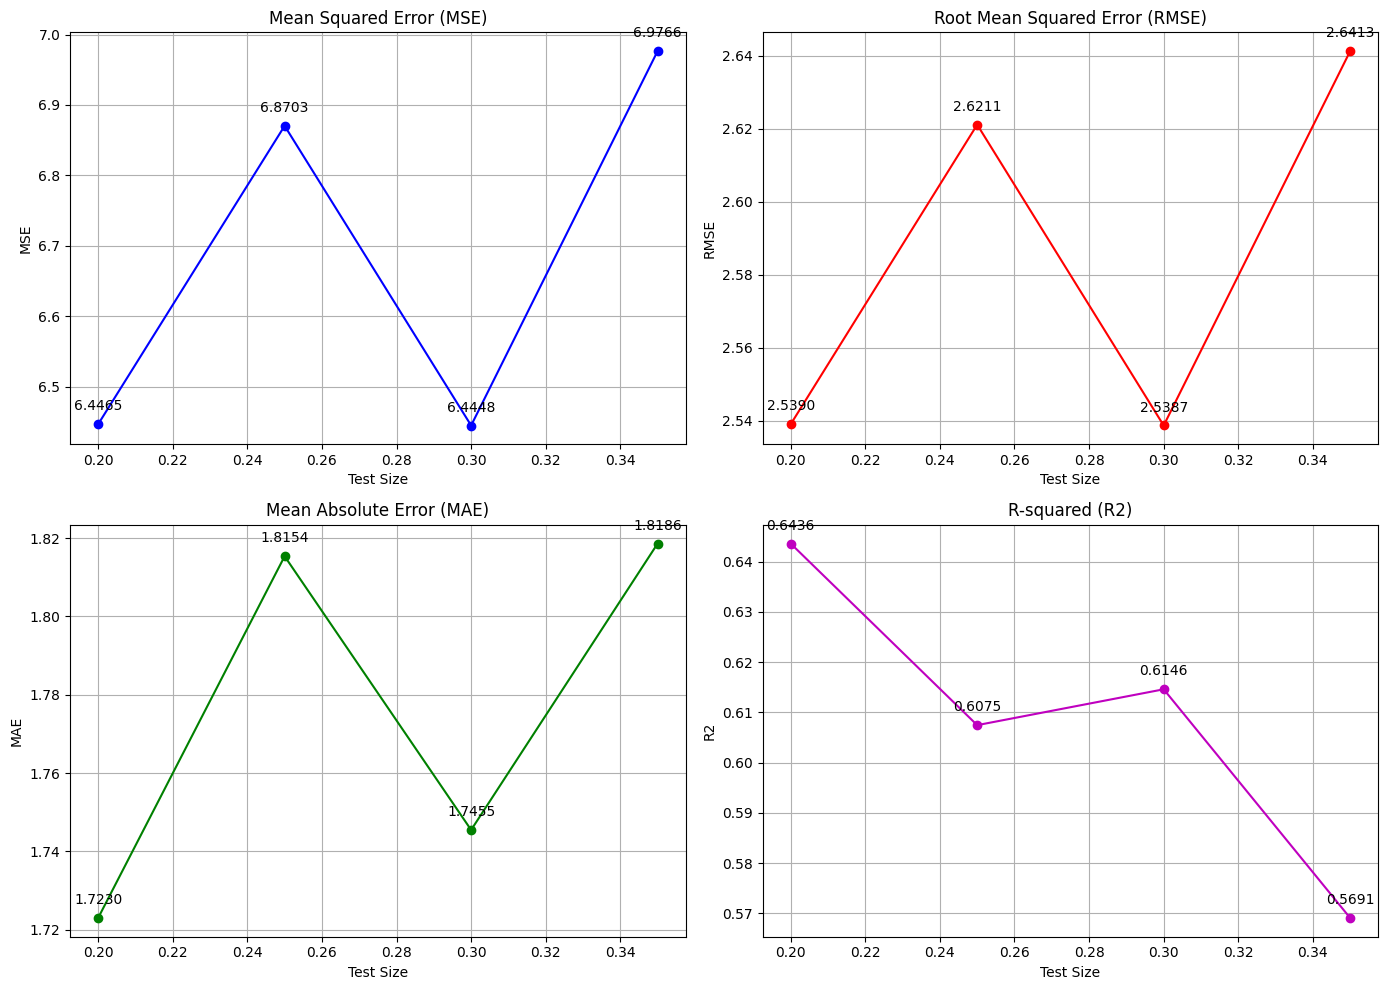

In [15]:
# import matplotlib.pyplot as plt

# # Data
test_size = [0.2, 0.25, 0.3, 0.35]
# mse = [6.4465, 6.8703, 6.4448, 6.9766]
# rmse = [2.5390, 2.6211, 2.5387, 2.6413]
# mae = [1.7230, 1.8154, 1.7455, 1.8186]
# r2 = [0.6436, 0.6075, 0.6146, 0.5691]

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot MSE
axes[0, 0].plot(test_size, mse, marker='o', linestyle='-', color='b')
for i, txt in enumerate(mse):
    axes[0, 0].annotate(f'{txt:.4f}', (test_size[i], mse[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].set_xlabel('Test Size')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].grid(True)

# Plot RMSE
axes[0, 1].plot(test_size, rmse, marker='o', linestyle='-', color='r')
for i, txt in enumerate(rmse):
    axes[0, 1].annotate(f'{txt:.4f}', (test_size[i], rmse[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[0, 1].set_title('Root Mean Squared Error (RMSE)')
axes[0, 1].set_xlabel('Test Size')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].grid(True)

# Plot MAE
axes[1, 0].plot(test_size, mae, marker='o', linestyle='-', color='g')
for i, txt in enumerate(mae):
    axes[1, 0].annotate(f'{txt:.4f}', (test_size[i], mae[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[1, 0].set_title('Mean Absolute Error (MAE)')
axes[1, 0].set_xlabel('Test Size')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].grid(True)

# Plot R2
axes[1, 1].plot(test_size, r2, marker='o', linestyle='-', color='m')
for i, txt in enumerate(r2):
    axes[1, 1].annotate(f'{txt:.4f}', (test_size[i], r2[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[1, 1].set_title('R-squared (R2)')
axes[1, 1].set_xlabel('Test Size')
axes[1, 1].set_ylabel('R2')
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
